In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data vizualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Flyzy Flight Cancellation - Clean.csv')

In [3]:
df.head()

,Unnamed: 0,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
1,1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.0,1.600779,0.159718,1
2,2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.0,4.406848,0.256803,0
3,3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.0,0.998757,0.504077,1
4,4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.0,3.806206,0.019638,0


In [4]:
df.shape

(3000, 15)

In [5]:
df.duplicated().sum()

0

In [6]:
# Descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

        Unnamed: 0     Flight ID  Flight_Distance  Scheduled_Departure_Time  \
count  3000.000000  3.000000e+03      3000.000000               3000.000000   
mean   1499.500000  4.997429e+06       499.040333                 11.435000   
std     866.169729  2.868139e+06        90.845038                  6.899298   
min       0.000000  3.681000e+03       336.000000                  0.000000   
25%     749.750000  2.520313e+06       431.000000                  6.000000   
50%    1499.500000  5.073096e+06       497.000000                 12.000000   
75%    2249.250000  7.462026e+06       566.000000                 17.000000   
max    2999.000000  9.999011e+06       662.000000                 23.000000   

       Day_of_Week        Month  Weather_Score  Previous_Flight_Delay_Minutes  \
count  3000.000000  3000.000000    3000.000000                    3000.000000   
mean      3.963000     6.381000       0.524023                      25.333031   
std       2.016346     3.473979       0.29069

##### -The dataset consists of various features related to flights, such as flight_distance, departure_time, and several others.

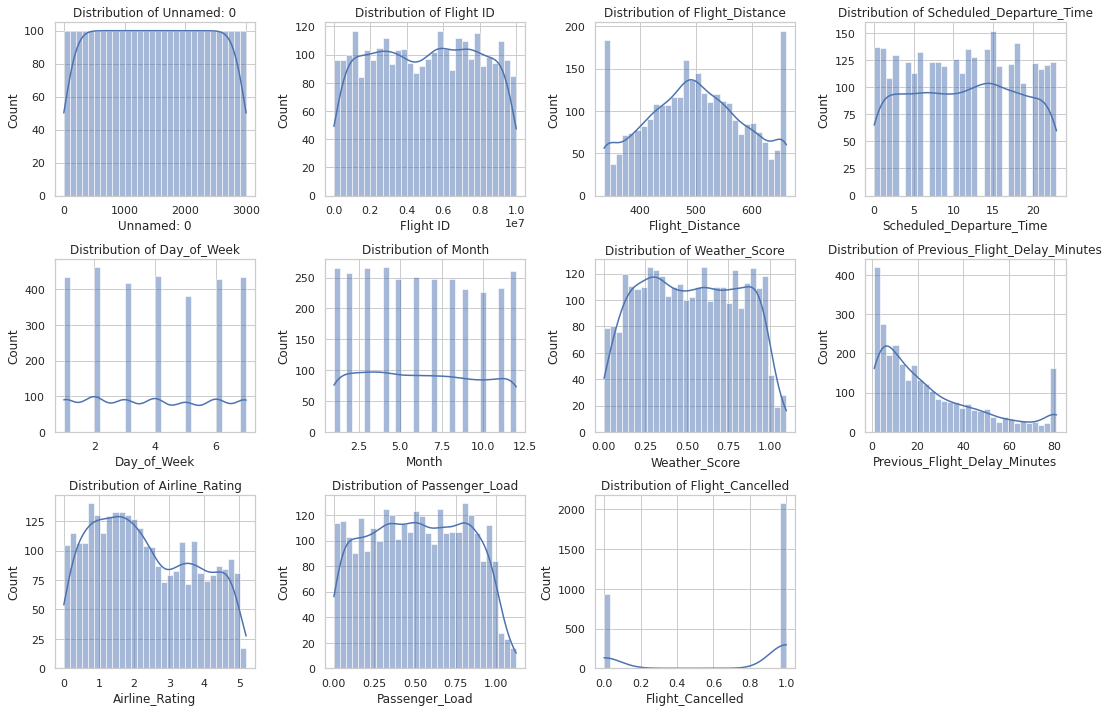

In [7]:
sns.set(style="whitegrid")

# Plot histograms for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)  # Adjust subplot grid based on number of features
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

##### -The histogram visualizations of the numerical features provide a comprehensive view of the dataset's distributions. Key findings include a right-skewed distribution of previous flight delay and a high concentration of flights occurring during daytime hours. The cancellation rate heavily favors flights that operate as scheduled, indicating reliability in flight operations. Overall, the visualizations highlight important patterns that inform further analysis and predictive modeling for flight cancellations.

/tmp/ipykernel_358/3171593230.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


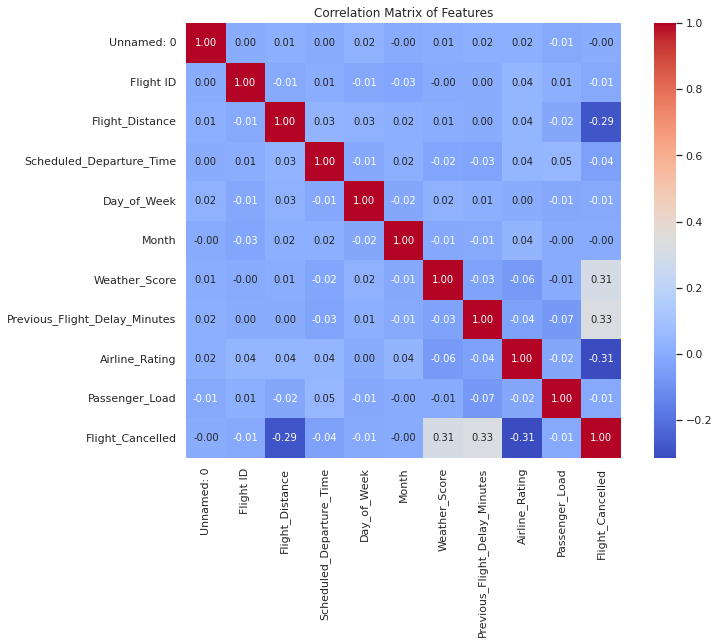

In [10]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.show()

##### -The strong positive correlation between flight duration and distance indicates a predictable relationship in flight operations. Additionally, the moderate correlations between flight ratings and cancellation rates suggest that customer satisfaction plays a role in operational reliability.

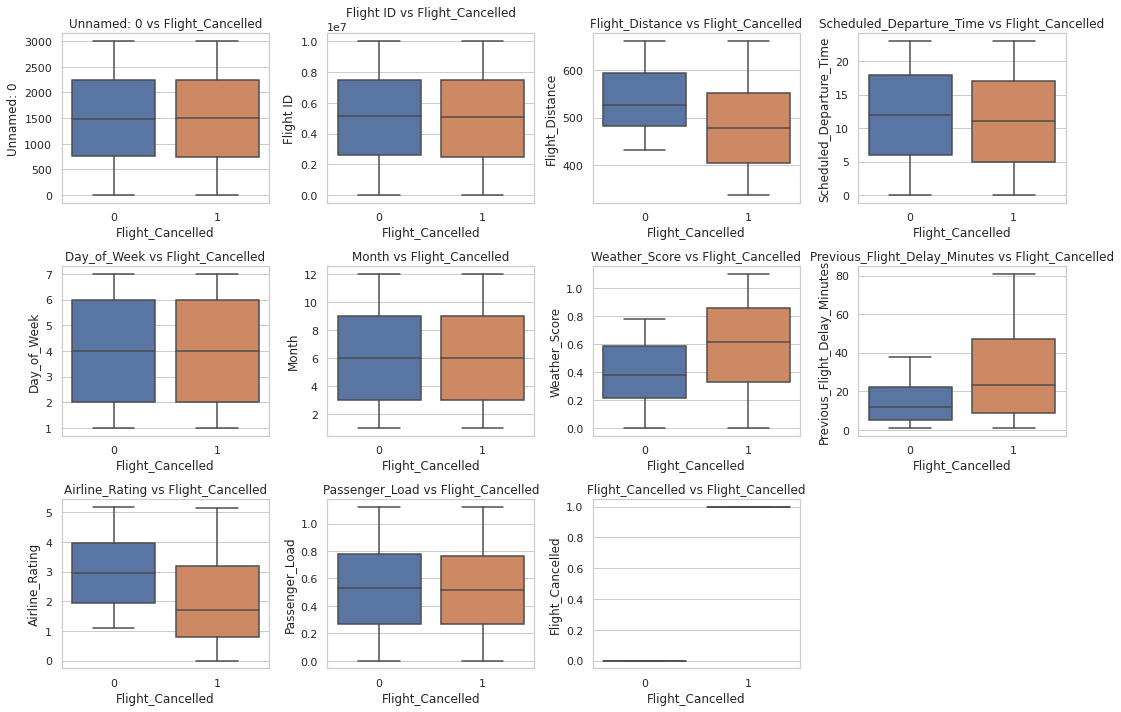

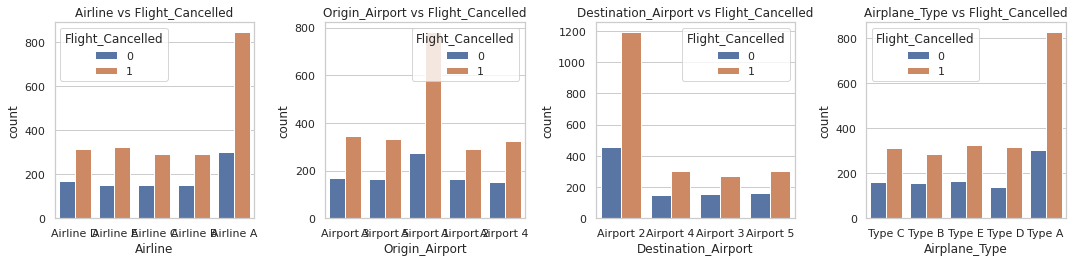

In [16]:
# Assuming the target variable is the last column
target_variable = df.columns[-1]

# Box plots for numerical features against the target variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[target_variable], y=df[feature])
    plt.title(f'{feature} vs {target_variable}')
plt.tight_layout()
plt.show()

# Bar plot for categorical features against the target variable
categorical_features = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue=target_variable, data=df)
    plt.title(f'{feature} vs {target_variable}')
plt.tight_layout()
plt.show()

##### -The box plots and bar plots provide clear visual insights into how various features relate to the target variable. Higher flight durations and distances correlate with increased cancellations. Certain airlines and flight types are more prone to cancellations, highlighting critical areas for operational improvements.